### Lending Club Case Study
Analyse the borrower load application and lending elgiblity in the bank.


In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
loan_data = pd.read_csv('loan.csv', header = 0, low_memory=False)

In [3]:
loan_data.shape

(39717, 111)

In [4]:
loan_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [5]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Checking data has NA or invalid data

In [6]:
for col in loan_data:
    print("{0}: {1}".format(col, loan_data[col].isnull().sum()))

id: 0
member_id: 0
loan_amnt: 0
funded_amnt: 0
funded_amnt_inv: 0
term: 0
int_rate: 0
installment: 0
grade: 0
sub_grade: 0
emp_title: 2459
emp_length: 1075
home_ownership: 0
annual_inc: 0
verification_status: 0
issue_d: 0
loan_status: 0
pymnt_plan: 0
url: 0
desc: 12940
purpose: 0
title: 11
zip_code: 0
addr_state: 0
dti: 0
delinq_2yrs: 0
earliest_cr_line: 0
inq_last_6mths: 0
mths_since_last_delinq: 25682
mths_since_last_record: 36931
open_acc: 0
pub_rec: 0
revol_bal: 0
revol_util: 50
total_acc: 0
initial_list_status: 0
out_prncp: 0
out_prncp_inv: 0
total_pymnt: 0
total_pymnt_inv: 0
total_rec_prncp: 0
total_rec_int: 0
total_rec_late_fee: 0
recoveries: 0
collection_recovery_fee: 0
last_pymnt_d: 71
last_pymnt_amnt: 0
next_pymnt_d: 38577
last_credit_pull_d: 2
collections_12_mths_ex_med: 56
mths_since_last_major_derog: 39717
policy_code: 0
application_type: 0
annual_inc_joint: 39717
dti_joint: 39717
verification_status_joint: 39717
acc_now_delinq: 0
tot_coll_amt: 39717
tot_cur_bal: 39717
ope

### The columns which has only unique values & NA values are dropped

In [7]:
con_colns = ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc', 'dti', \
             'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', \
             'total_pymnt', 'total_pymnt_inv',  'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', \
             'collection_recovery_fee', 'last_pymnt_amnt']
cat_colns = ['title', 'emp_length' ,'zip_code', 'addr_state','term', 'int_rate', 'grade', 'sub_grade', 'home_ownership', \
             'verification_status', 'issue_d', 'loan_status', 'earliest_cr_line', 'revol_util', 'initial_list_status', \
             'last_pymnt_d', 'last_credit_pull_d']

select_coln = cat_colns + con_colns
loan_data2 = loan_data[select_coln]
loan_data2.shape

(39717, 41)

In [8]:
for col in loan_data2:
    null_len = loan_data2[col].isnull().sum()
    if (null_len > 0):
        print("{0}: {1}".format(col, loan_data2[col].unique()))

title: ['Computer' 'bike' 'real estate business' ... 'Retiring credit card debt'
 'MBA Loan Consolidation' 'JAL Loan']
emp_length: ['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
revol_util: ['83.70%' '9.40%' '98.50%' ... '49.63%' '0.04%' '7.28%']
last_pymnt_d: ['Jan-15' 'Apr-13' 'Jun-14' 'May-16' 'Apr-12' 'Nov-12' 'Jun-13' 'Sep-13'
 'Jul-12' 'Oct-13' 'May-13' 'Feb-15' 'Aug-15' 'Oct-12' 'Sep-12' nan
 'Dec-12' 'Dec-14' 'Aug-13' 'Nov-13' 'Jan-14' 'Apr-14' 'Aug-14' 'Oct-14'
 'Aug-12' 'Jul-14' 'Jul-13' 'Jan-16' 'Feb-16' 'Apr-15' 'Feb-14' 'Sep-14'
 'Jun-12' 'Feb-13' 'Mar-13' 'May-14' 'Mar-15' 'Jan-13' 'Dec-13' 'Feb-12'
 'Mar-14' 'Sep-15' 'Nov-15' 'Mar-16' 'Jan-12' 'Oct-15' 'Nov-14' 'Mar-12'
 'May-12' 'Apr-16' 'Dec-15' 'Jun-15' 'May-15' 'Jul-15' 'Dec-11' 'Nov-11'
 'Oct-11' 'Sep-11' 'Aug-11' 'Jul-11' 'Jun-11' 'May-11' 'Apr-11' 'Mar-11'
 'Feb-11' 'Jan-11' 'Dec-10' 'Nov-10' 'Oct-10' 'Sep-10' 'Aug-10' 'Jul-10'
 'Jun-10' 'May-

In [9]:
for col in loan_data2:
    null_len = loan_data2[col].isnull().sum()
    if (null_len > 0):
        print("{0}: {1}".format(col, loan_data2[col].mode()[0]))

title: Debt Consolidation
emp_length: 10+ years
revol_util: 0%
last_pymnt_d: May-16
last_credit_pull_d: May-16


In [10]:
loan_data2['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [11]:
loan_data2.emp_length.fillna(loan_data2['emp_length'].mode()[0], inplace=True)
loan_data2.revol_util.fillna(loan_data2['revol_util'].mode()[0], inplace=True)
loan_data2.last_pymnt_d.fillna(loan_data2['last_pymnt_d'].mode()[0], inplace=True)
loan_data2.last_credit_pull_d.fillna(loan_data2['last_credit_pull_d'].mode()[0], inplace=True)

/var/folders/35/pmwqgjkj2rl0sqpqjpjcrk980000gn/T/ipykernel_4443/1794067629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data2.emp_length.fillna(loan_data2['emp_length'].mode()[0], inplace=True)
/var/folders/35/pmwqgjkj2rl0sqpqjpjcrk980000gn/T/ipykernel_4443/1794067629.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data2.revol_util.fillna(loan_data2['revol_util'].mode()[0], inplace=True)
/var/folders/35/pmwqgjkj2rl0sqpqjpjcrk980000gn/T/ipykernel_4443/1794067629.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: htt

### Cleanup data of Continuous variables

In [12]:
loan_data2.emp_length = loan_data2.emp_length.apply(lambda x: str(0) if '<' in x else str("".join(re.findall(r'\d+', x)))).astype("int64")
loan_data2.int_rate = loan_data2.int_rate.apply(lambda x:  str("".join(re.findall(r'\d+\.\d+', x)))).astype("float64")

/var/folders/35/pmwqgjkj2rl0sqpqjpjcrk980000gn/T/ipykernel_4443/2154507331.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data2.emp_length = loan_data2.emp_length.apply(lambda x: str(0) if '<' in x else str("".join(re.findall(r'\d+', x)))).astype("int64")
/var/folders/35/pmwqgjkj2rl0sqpqjpjcrk980000gn/T/ipykernel_4443/2154507331.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data2.int_rate = loan_data2.int_rate.apply(lambda x:  str("".join(re.findall(r'\d+\.\d+', x)))).astype("float64")


### Finding Outliers on Continuous Variables

In [13]:
loan_data2[con_colns].describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000


(39717, 41)


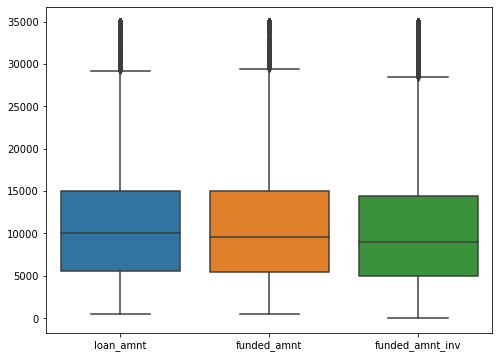

In [14]:
print (loan_data2.shape)
plt.figure(figsize = [8,6])
ax = sns.boxplot(data = loan_data2[['loan_amnt', 'funded_amnt', 'funded_amnt_inv']])
plt.show()

In [15]:
IQR = loan_data2.loan_amnt.quantile(0.75) - loan_data2.loan_amnt.quantile(0.25)

LW = loan_data2.loan_amnt.quantile(0.25) - (1.5 * IQR)
HW = loan_data2.loan_amnt.quantile(0.75) + (1.5 * IQR)

loan_data2 = loan_data2[(loan_data2.loan_amnt >= LW) & (loan_data2.loan_amnt <= HW)]

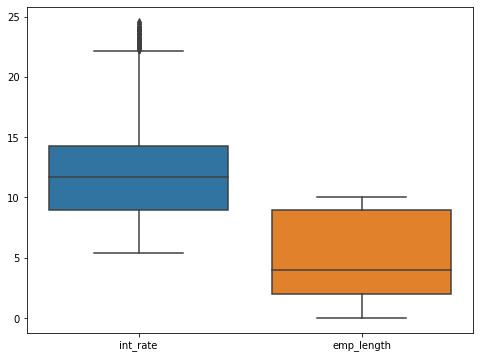

(38487, 41)

In [16]:
plt.figure(figsize = [8,6])
ax = sns.boxplot(data = loan_data2[['int_rate', 'emp_length']])
plt.show()
loan_data2.shape

TypeError: 'NoneType' object is not iterable

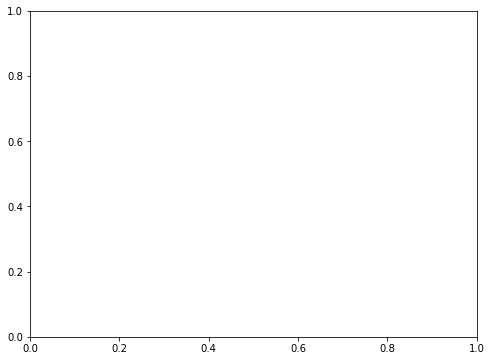

In [67]:
plt.figure(figsize = [8,6])
ax = sns.histplot(loan_data2[['term']])
plt.show()

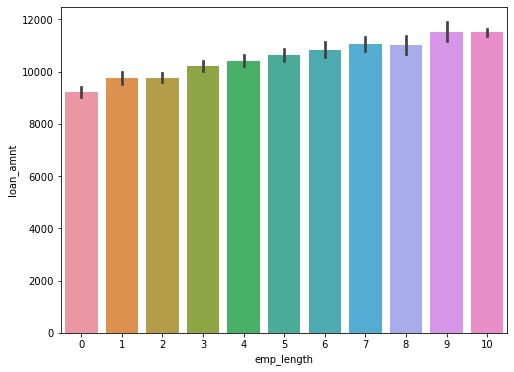

In [18]:
plt.figure(figsize = [8,6])
ax = sns.barplot(x = loan_data2.emp_length, y = loan_data2.loan_amnt)
plt.show()

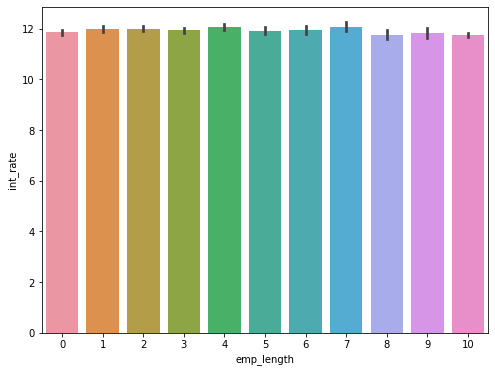

In [65]:
plt.figure(figsize = [8,6])
ax = sns.barplot(x = loan_data2.emp_length, y = loan_data2.int_rate)
plt.show()

In [20]:
loan_data2.zip_code = loan_data2.zip_code.apply(lambda x: x[:3]).astype("int64")

In [21]:
loan_data2.zip_code.value_counts()

100    580
945    529
112    506
606    493
70     454
      ... 
595      1
381      1
169      1
414      1
469      1
Name: zip_code, Length: 823, dtype: int64

<AxesSubplot:xlabel='zip_code', ylabel='Count'>

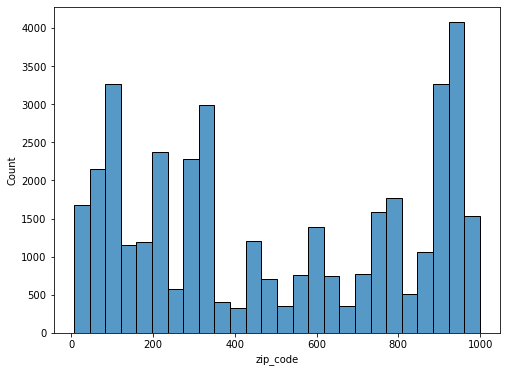

In [22]:
plt.figure(figsize = [8,6])
sns.histplot(loan_data2.zip_code)

<AxesSubplot:xlabel='dti', ylabel='Count'>

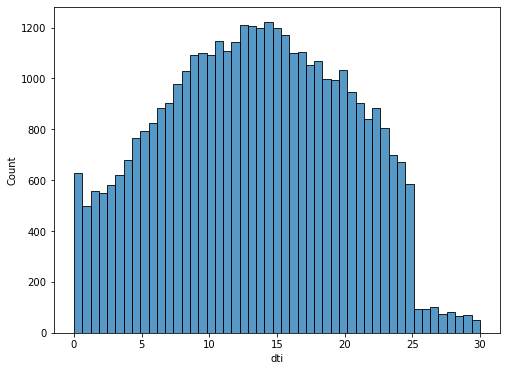

In [23]:
plt.figure(figsize = [8,6])
sns.histplot(loan_data2.dti)

In [50]:
IQR = loan_data2.dti.quantile(0.75) - loan_data2.dti.quantile(0.25)

LW = loan_data2.dti.quantile(0.25) - (0.4 * IQR)
HW = loan_data2.dti.quantile(0.75) + (0.4 * IQR)

print(LW, HW)
loan_data3 = loan_data2[(loan_data2.dti >= LW) & (loan_data2.dti <= HW)]
loan_data3.shape

3.983999999999999 22.776000000000003


(31530, 41)

<AxesSubplot:xlabel='dti', ylabel='Count'>

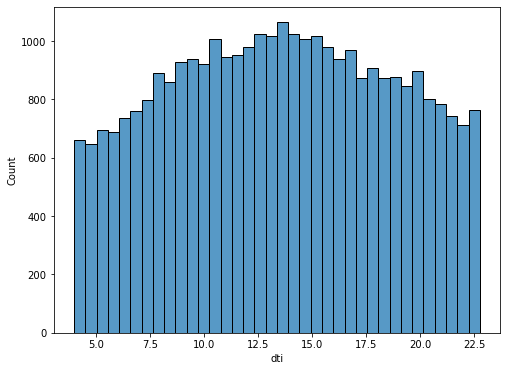

In [51]:
plt.figure(figsize = [8,6])
sns.histplot(loan_data3.dti)

In [52]:
zipdata = dict(loan_data3.zip_code.value_counts())

def enablezip(x, zipdata):
    value = int(zipdata[x])
    if value > 0:
        return True
    else:
        return False
    
zip_flag = loan_data3.zip_code.apply(lambda x: enablezip(x, zipdata))

In [53]:
loan_data4 = loan_data3[zip_flag == True]
loan_data4.shape

(31530, 41)

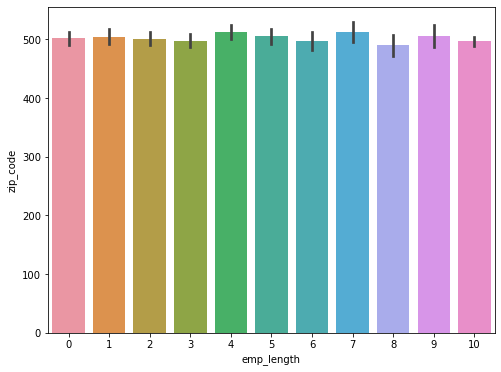

In [58]:
plt.figure(figsize = [8,6])
ax = sns.barplot(x = loan_data4.emp_length, y = loan_data4.zip_code)
plt.show()

<Figure size 576x432 with 0 Axes>

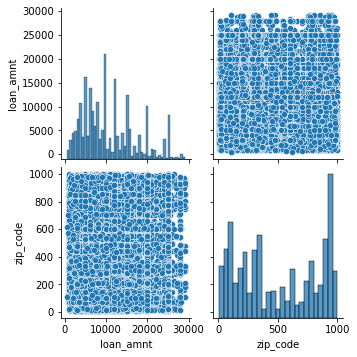

In [63]:
plt.figure(figsize = [8,6])
sns.pairplot(loan_data4[['loan_amnt', 'zip_code']])
plt.show()

NameError: name 'python' is not defined